# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

from config import api_key

# Import API key

# Incorporated citipy to determine city based on latitude and longitude

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)


f1a313cf23f6bc32f92edeffe96219ac


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



# Print the city count to confirm sufficient count
len(cities)



621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

query_url
city="Arlington, Virginia"

response = requests.get(query_url + city).json()
#response["main"]["temp"]
query_url
response

{'coord': {'lon': -97.11, 'lat': 32.74},
 'weather': [{'id': 300,
   'main': 'Drizzle',
   'description': 'light intensity drizzle',
   'icon': '09d'},
  {'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 16.39,
  'pressure': 1021,
  'humidity': 88,
  'temp_min': 13,
  'temp_max': 20},
 'visibility': 2012,
 'wind': {'speed': 3.1, 'deg': 320},
 'rain': {'1h': 0.25},
 'clouds': {'all': 90},
 'dt': 1572984352,
 'sys': {'type': 1,
  'id': 3783,
  'country': 'US',
  'sunrise': 1572958165,
  'sunset': 1572996877},
 'timezone': -21600,
 'id': 4671240,
 'name': 'Arlington',
 'cod': 200}

In [4]:
# set up lists to hold reponse info

citiesTemperature= pd.DataFrame(cities, columns=["Cities"])
citiesTemperature["Latitude"]=""
citiesTemperature["Longtitude"]=""
citiesTemperature["Temperature"]=""
citiesTemperature["Humidity"]=""
citiesTemperature["Wind speed"]=""
citiesTemperature["Cloudiness"]=""




citiesTemperature.head()

,Cities,Latitude,Longtitude,Temperature,Humidity,Wind speed,Cloudiness
0,rikitea,,,,,,
1,mataura,,,,,,
2,provideniya,,,,,,
3,hobart,,,,,,
4,cairns,,,,,,


In [5]:
# Loop through the list of cities and perform a request for data on each

# call requests:
#response["coord"]["lon"]
#response["coord"]["lat"]
#response["name"]
#response["main"]["humidity"]
#response["wind"]["speed"]
#response["clouds"]["all"]
#response["dt"]

DateRetrieved= pd.to_datetime('today').strftime("%m/%d/%Y")

for index, row in citiesTemperature.iterrows():
        city = row['Cities']
    
        try:
            response = requests.get(query_url + city).json()
            tem=response['main']["temp_max"]
            weather= response["weather"][0]["description"]
            
            #temp.append(response['main']['temp'])
            citiesTemperature.loc[index, "Cities"] = response["name"]
            citiesTemperature.loc[index, "Latitude"] = response["coord"]["lat"]
            citiesTemperature.loc[index, "Longtitude"] = response["coord"]["lon"]
            citiesTemperature.loc[index, "Temperature"] = response['main']["temp_max"]
            citiesTemperature.loc[index, "Humidity"] = response["main"]["humidity"]
            citiesTemperature.loc[index, "Wind speed"] = response["wind"]["speed"]
            citiesTemperature.loc[index, "Cloudiness"] = response["clouds"]["all"]
            print(f"The max temperature of {city} today  is: {tem} and the weather is {weather}")

        except:
            #citiesTemperature.loc[index, "Cities"] = "No Values"
            #print(f"Missing Value")
            continue
            
        



The max temperature of rikitea today  is: 24.84 and the weather is clear sky
The max temperature of mataura today  is: 12.22 and the weather is overcast clouds
The max temperature of provideniya today  is: -3 and the weather is overcast clouds
The max temperature of hobart today  is: 11.11 and the weather is few clouds
The max temperature of cairns today  is: 19.44 and the weather is clear sky
The max temperature of castro today  is: 12 and the weather is broken clouds
The max temperature of guerrero negro today  is: 24.87 and the weather is scattered clouds
The max temperature of raudeberg today  is: 3.33 and the weather is overcast clouds
The max temperature of nikolskoye today  is: 1.67 and the weather is light shower snow
The max temperature of salym today  is: -0.66 and the weather is light snow
The max temperature of ushuaia today  is: 6 and the weather is shower rain
The max temperature of tabat today  is: 22.65 and the weather is few clouds
The max temperature of punta arenas t

The max temperature of arraial do cabo today  is: 36 and the weather is overcast clouds
The max temperature of joshimath today  is: 4.13 and the weather is clear sky
The max temperature of graham today  is: 16.67 and the weather is overcast clouds
The max temperature of barrow today  is: 17.4 and the weather is clear sky
The max temperature of puerto ayora today  is: 27 and the weather is few clouds
The max temperature of lebu today  is: 16 and the weather is few clouds
The max temperature of hermanus today  is: 17.78 and the weather is broken clouds
The max temperature of mananjary today  is: 17.56 and the weather is scattered clouds
The max temperature of thompson today  is: -13 and the weather is overcast clouds
The max temperature of cidreira today  is: 19.98 and the weather is overcast clouds
The max temperature of bubaque today  is: 28.9 and the weather is clear sky
The max temperature of laukaa today  is: -6.67 and the weather is clear sky
The max temperature of aosta today  is:

The max temperature of chenzhou today  is: 12.67 and the weather is clear sky
The max temperature of tasiilaq today  is: -2.07 and the weather is overcast clouds
The max temperature of naze today  is: 25 and the weather is thunderstorm
The max temperature of dawson creek today  is: -8 and the weather is overcast clouds
The max temperature of tongren today  is: 12.56 and the weather is light rain
The max temperature of ecoporanga today  is: 27.21 and the weather is scattered clouds
The max temperature of hamilton today  is: 9.44 and the weather is broken clouds
The max temperature of fairbanks today  is: -10 and the weather is clear sky
The max temperature of hasaki today  is: 8 and the weather is light rain
The max temperature of haimen today  is: 15 and the weather is clear sky
The max temperature of myanaung today  is: 22.47 and the weather is light rain
The max temperature of saint anthony today  is: 12.22 and the weather is clear sky
The max temperature of okha today  is: 0.97 and 

The max temperature of elena today  is: 15 and the weather is clear sky
The max temperature of rocha today  is: 16.21 and the weather is clear sky
The max temperature of pandan today  is: 27.91 and the weather is moderate rain
The max temperature of bada today  is: 23.67 and the weather is scattered clouds
The max temperature of ankara today  is: 14.44 and the weather is clear sky
The max temperature of mangrol today  is: 21.87 and the weather is overcast clouds
The max temperature of songjianghe today  is: -3.78 and the weather is scattered clouds
The max temperature of teguise today  is: 21 and the weather is scattered clouds
The max temperature of tulun today  is: -7.91 and the weather is overcast clouds
The max temperature of krasyliv today  is: 13.14 and the weather is scattered clouds
The max temperature of omsukchan today  is: -10.28 and the weather is light snow
The max temperature of paso de carrasco today  is: 25 and the weather is clear sky
The max temperature of nantucket t

The max temperature of padang today  is: 18.12 and the weather is overcast clouds
The max temperature of cam ranh today  is: 19.43 and the weather is overcast clouds
The max temperature of north platte today  is: 12.22 and the weather is overcast clouds
The max temperature of teknaf today  is: 20.17 and the weather is broken clouds
The max temperature of bambanglipuro today  is: 20.77 and the weather is few clouds
The max temperature of broome today  is: 10.56 and the weather is broken clouds
The max temperature of juigalpa today  is: 33 and the weather is scattered clouds
The max temperature of srednekolymsk today  is: -19.56 and the weather is overcast clouds
The max temperature of mpulungu today  is: 21.53 and the weather is scattered clouds
The max temperature of baruun-urt today  is: -2.88 and the weather is scattered clouds
The max temperature of southbridge today  is: 13.89 and the weather is moderate rain
The max temperature of tadine today  is: 24.28 and the weather is clear s

The max temperature of otradnoye today  is: 1.67 and the weather is light shower snow
The max temperature of valparaiso today  is: 8 and the weather is clear sky
The max temperature of tres pontas today  is: 21.02 and the weather is moderate rain
The max temperature of manggar today  is: 28.54 and the weather is overcast clouds
The max temperature of puerto penasco today  is: 23.33 and the weather is broken clouds
The max temperature of chhoti sadri today  is: 21.8 and the weather is broken clouds
The max temperature of qazvin today  is: 7 and the weather is clear sky
The max temperature of berlevag today  is: 1 and the weather is few clouds
The max temperature of ciudad bolivar today  is: 29.27 and the weather is moderate rain
The max temperature of gazli today  is: -1.11 and the weather is clear sky
The max temperature of salinas today  is: 26.67 and the weather is clear sky
The max temperature of praia today  is: 28 and the weather is shower rain
The max temperature of sambava today

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#reformatting and cleaning data

citiesTemperature["Temperature"]=pd.to_numeric(citiesTemperature["Temperature"], downcast='float')
citiesTemperature["Longtitude"]=pd.to_numeric(citiesTemperature["Longtitude"], downcast='float')
citiesTemperature["Latitude"]=pd.to_numeric(citiesTemperature["Latitude"], downcast='float')
citiesTemperature["Humidity"]=pd.to_numeric(citiesTemperature["Humidity"], downcast='float')
citiesTemperature["Wind speed"]=pd.to_numeric(citiesTemperature["Wind speed"], downcast='float')
citiesTemperature["Cloudiness"]=pd.to_numeric(citiesTemperature["Cloudiness"], downcast='float')


citiesTemperature=citiesTemperature.dropna(how="any")

citiesTemperature.dtypes
citiesTemperature.to_csv("Weather Report.csv",index=False)
citiesTemperature.head()

,Cities,Latitude,Longtitude,Temperature,Humidity,Wind speed,Cloudiness
0,Rikitea,-23.120001,-134.970001,24.840000,80.0,2.40,0.0
1,Mataura,-46.189999,168.860001,12.220000,78.0,1.79,93.0
2,Provideniya,64.419998,-173.229996,-3.000000,73.0,3.00,90.0
3,Hobart,-42.880001,147.330002,11.110000,57.0,4.60,20.0
4,Cairns,-16.920000,145.770004,19.440001,88.0,1.00,1.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

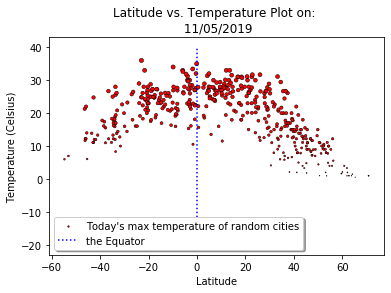

In [11]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Temperature"]


#plotting the axises
plt.scatter(x_axis, y,marker ='.',
            linewidth=0.5,
            label="Today's max temperature of random cities",
            facecolors="red", edgecolors="black",
            s=2*y)
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Temperature Plot on: \n {DateRetrieved}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.vlines(0,-20,40, alpha=1, color='blue', label='the Equator', linestyles='dotted')
plt.legend(loc='best', shadow = True) 


# Show the Figure
plt.savefig("Images/Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

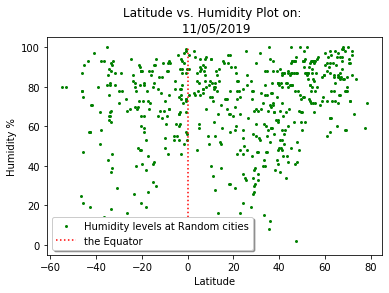

In [8]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Humidity"]


#plotting the axises
plt.scatter(x_axis, y,marker ='.', color='green', linewidth=0, label="Humidity levels at Random cities")
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Humidity Plot on: \n {DateRetrieved}")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.vlines(0,0,100, alpha=1, color='red', label='the Equator', linestyles='dotted')
plt.legend(loc='best', framealpha =1,shadow = True ) 


# Show the Figure
plt.savefig("Images/Latitude vs. Humidity Plot.png")
plt.show()


#### Latitude vs. Cloudiness Plot

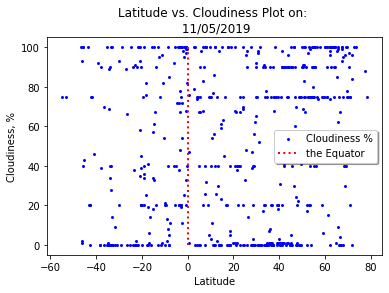

In [9]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Cloudiness"]


#plotting the axises
plt.scatter(x_axis, y,marker ='.', color='blue', linewidth=0,label="Cloudiness %")
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Cloudiness Plot on: \n {DateRetrieved}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness, %")
plt.vlines(0,0,100,
           color='red',
           label='the Equator',
           linestyles='dotted',
           linewidth=2)

plt.legend(loc='best', shadow = True) 


# Show the Figure
plt.savefig("Images/Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

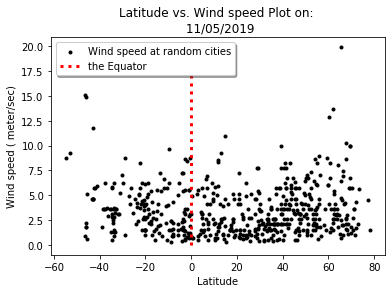

In [10]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Wind speed"]


#plotting the axises
plt.scatter(x_axis,
            y,marker ='.',
            color='black',
            linewidth=1,
            label="Wind speed at random cities",
            )
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Wind speed Plot on: \n {DateRetrieved}" )
plt.xlabel("Latitude")
plt.ylabel("Wind speed ( meter/sec)")
plt.vlines(0,0,18, alpha=1, color='red', label='the Equator', linestyles='dotted', linewidth=3)
plt.legend(loc='best', shadow = True) 


# Show the Figure
plt.savefig("Images/Latitude vs. Wind speed Plot.png")
plt.show()

## Observations

1. There seems to be a strong visual indication of a relationship between current temperature and proximity to the equator. As cities are located closer to the equator the current temperature seems to rise. 

2. There is no visual indication of any relationship between humidity and cloudiness.

3. But there seems to be some visual correlation between current wind speed and proximity to the Equator.